In [1]:
#librairy / header files
from copy import deepcopy
import numpy as np
import pandas as pd
import dill 
import scipy.io as sio
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans,KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def split(arr, cond):
  return [arr[cond], arr[~cond]]

In [3]:
#taking input from matlab
cam0_label = sio.loadmat('IXMAS\IXMAS_cam0_labels.mat')
cam0_feature = sio.loadmat('IXMAS\IXMAS_cam0_win_feature.mat')
cam1_label = sio.loadmat('IXMAS\IXMAS_cam1_labels.mat')
cam1_feature = sio.loadmat('IXMAS\IXMAS_cam1_win_feature.mat')
cam2_label = sio.loadmat('IXMAS\IXMAS_cam2_labels.mat')
cam2_feature = sio.loadmat('IXMAS\IXMAS_cam2_win_feature.mat')
cam3_label = sio.loadmat('IXMAS\IXMAS_cam3_labels.mat')
cam3_feature = sio.loadmat('IXMAS\IXMAS_cam3_win_feature.mat')
cam4_label = sio.loadmat('IXMAS\IXMAS_cam4_labels.mat')
cam4_feature = sio.loadmat('IXMAS\IXMAS_cam4_win_feature.mat')


In [4]:
#extrating to numpy array
cam0_l = cam0_label['labels']
cam1_l = cam1_label['labels']
cam2_l = cam2_label['labels']
cam3_l = cam3_label['labels']
cam4_l = cam4_label['labels']
cam0_f = cam0_feature['win_feature']
cam1_f = cam1_feature['win_feature']
cam2_f = cam2_feature['win_feature']
cam3_f = cam3_feature['win_feature']
cam4_f = cam4_feature['win_feature']
#print(cam0_f[1][0:20])

cam0_l_train , cam0_l_test = split(cam0_l , cam0_l[:, 0]<22)
cx , cy = np.shape(cam0_l_train)
cam0_f_train = cam0_f[:cx ,:]
cam0_f_test = cam0_f[cx: , :]

cam1_l_train , cam1_l_test = split(cam1_l , cam1_l[:, 0]<22)
cx , cy = np.shape(cam1_l_train)
cam1_f_train = cam1_f[:cx ,:]
cam1_f_test = cam1_f[cx: , :]

cam2_l_train , cam2_l_test = split(cam2_l , cam2_l[:, 0]<22)
cx , cy = np.shape(cam2_l_train)
cam2_f_train = cam2_f[:cx ,:]
cam2_f_test = cam2_f[cx: , :]

cam3_l_train , cam3_l_test = split(cam3_l , cam3_l[:, 0]<22)
cx , cy = np.shape(cam3_l_train)
cam3_f_train = cam3_f[:cx ,:]
cam3_f_test = cam3_f[cx: , :]

cam4_l_train , cam4_l_test = split(cam4_l , cam4_l[:, 0]<22)
cx , cy = np.shape(cam4_l_train)
cam4_f_train = cam4_f[:cx ,:]
cam4_f_test = cam4_f[cx: , :]


cam0_l_test , cam_l_dummy = split(cam0_l_test , cam0_l_test[:, 0]<31)
cx , cy = np.shape(cam0_l_test)
cam0_f_test = cam0_f_test[:cx ,:]
cam_f_dummy = cam0_f_test[cx: , :]

cam1_l_test , cam_l_dummy = split(cam1_l_test , cam1_l_test[:, 0]<31)
cx , cy = np.shape(cam1_l_test)
cam1_f_test = cam1_f_test[:cx ,:]
cam_f_dummy = cam1_f_test[cx: , :]

cam2_l_test , cam_l_dummy = split(cam2_l_test , cam2_l_test[:, 0]<31)
cx , cy = np.shape(cam2_l_test)
cam2_f_test = cam2_f_test[:cx ,:]
cam_f_dummy = cam2_f_test[cx: , :]

cam3_l_test , cam_l_dummy = split(cam3_l_test , cam3_l_test[:, 0]<31)
cx , cy = np.shape(cam3_l_test)
cam3_f_test = cam3_f_test[:cx ,:]
cam_f_dummy = cam3_f_test[cx: , :]

cam4_l_test , cam_l_dummy = split(cam4_l_test , cam4_l_test[:, 0]<31)
cx , cy = np.shape(cam4_l_test)
cam4_f_test = cam4_f_test[:cx ,:]
cam_f_dummy = cam4_f_test[cx: , :]


print(np.shape(cam0_f_train))
print(np.shape(cam1_f_train))
print(np.shape(cam2_f_train))
print(np.shape(cam3_f_train))
print(np.shape(cam4_f_train))
print(np.shape(cam0_f_test))
print(np.shape(cam1_f_test))
print(np.shape(cam2_f_test))
print(np.shape(cam3_f_test))
print(np.shape(cam4_f_test)) 

(24653, 286)
(24675, 286)
(24696, 286)
(24716, 286)
(24736, 286)
(10104, 286)
(10113, 286)
(10122, 286)
(10131, 286)
(10140, 286)


In [5]:
#now need to group feature of each class seperatly
# making a list of size 14 * n * 286 ( [action_i][number of frames] [ features]) 
#where n is the number of frames belonging to action_i

In [6]:
#function to extract features from a viewpoint ( camera ) to feature_per_class list 

def extract_features_per_class( cam_l , cam_f , feature_per_class , label_per_class):
    j = 0 ;
    for i in cam_l:
        feature_per_class[ i[1] ].append( cam_f[j] ) ;
        label_per_class[ i[1] ].append( cam_l[j] ) ;
        j += 1 ;

In [7]:
total_class = 14
feature_per_class = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
label_per_class = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

extract_features_per_class( cam0_l_train ,cam0_f_train , feature_per_class ,label_per_class)
extract_features_per_class( cam1_l_train ,cam1_f_train , feature_per_class ,label_per_class)
extract_features_per_class( cam2_l_train ,cam2_f_train , feature_per_class ,label_per_class )
extract_features_per_class( cam3_l_train ,cam3_f_train , feature_per_class ,label_per_class)
extract_features_per_class( cam4_l_train ,cam4_f_train , feature_per_class ,label_per_class)


In [8]:
for i in feature_per_class:
    print(len(i))

23581
6505
7320
8080
7635
7845
8310
16715
6565
5335
7435
6885
7010
4255


In [9]:
#inserting all features and label in a single numpy array
total_f = 0
for i in label_per_class:
    total_f += len(i)
    
total_feature = np.zeros((total_f , 286))
total_labels = np.zeros((total_f , 2))

index = 0
for i in feature_per_class:
    for j in i:
        index_ = 0 
        for k in j :
            total_feature[index][index_] = k
            index_ += 1
        index += 1

index = 0
for i in label_per_class:
    for j in i:
        index_ = 0 
        for k in j :
            total_labels[index][index_] = k
            index_ += 1
        index += 1
total_feature_length = np.shape(total_feature)[0] ;
new_feature = [] ;
new_labels = [] ;
for i in range ( total_feature_length ) :
    if ( total_labels[i][1] >= 2 and total_labels[i][1] <= 11 ) :
        new_feature.append ( total_feature[i] ) ;
        new_labels.append ( total_labels[i] ) ;
total_feature = new_feature ;
total_labels = new_labels ;
print ( np.shape ( total_feature ) ) ;

(82125, 286)


### To build the dictionary of keyposes-
- the feature descriptors for every fourth frame in the training data are clustered via the k-means - algorithm.<br>
- For these experiments, k was set to 150 clusters per class.<br> 
- We initialized k-means 5 times and selected the cluster assignment with minimum energy, as measured by average intra-class similarity.<br>
- Using the elbow method, we choose K = 1000 for i3DPost and K = 1650 for IXMAS.<br>
- Algorithm1Learning discriminative key poses<br>
Input:<br>
feature vector for all frames of all videos<br>
Output:<br>
Key poses and their weights <br>
Let 𝑘 represents the number of clusters,<br>
𝐴 = {𝑎1,𝑎2,...𝑎𝑟}be the set of actions,<br>
𝑝𝑖𝑗 denotes 𝑗 − 𝑡ℎ key pose of action 𝑖 and 𝑤𝑖𝑗 be the its weight <br>
> 1: for all action 𝑎 ∈ 𝐴 do <br>
2: 		Cluster all frames into k groups using k-means <br>
3: 		Take cluster centers as keyposes thus ending up with 𝑟×𝑘 key poses <br> 
4: endfor <br>
5: for all actions 𝑎 ∈ 𝐴 do<br>
6: 		for all frames 𝑓 ∈ 𝑎 do <br>
7: 			Assign the key pose 𝑝𝑖𝑗 to 𝑓 such that ∥𝑓 −𝑝𝑖𝑗∥ is minimum <br>
8: 			endfor<br>
9: 		endfor <br>
10:Let 𝑛𝑖𝑗 and 𝑛′𝑖𝑗 respectively denotes number of withinclass assignments and number of out-of-class assignments to 𝑝𝑖𝑗<br>
11:𝑤𝑖𝑗 := 𝑛𝑖𝑗/ (𝑛𝑖𝑗 + 𝑛′𝑖𝑗)∀𝑖,𝑗

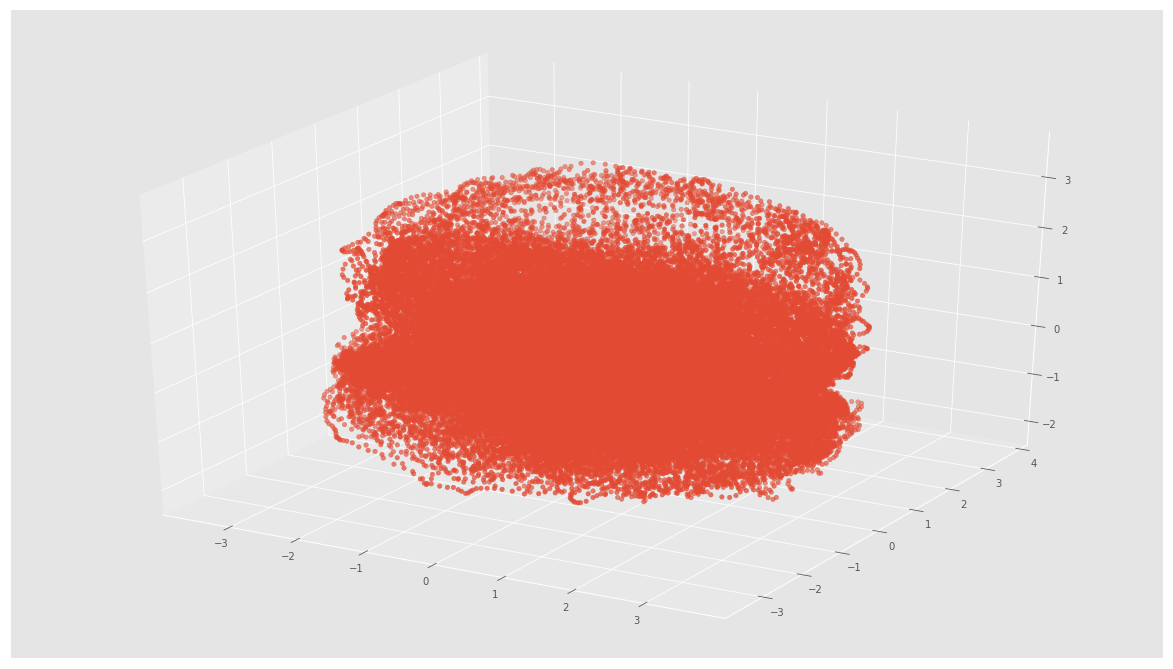

In [11]:
X_scaled = total_feature
pca = PCA(n_components=3)
pca.fit(X_scaled)
X = pca.transform(X_scaled)
X1 = []
X2 = []
X3 = []
for i in X:
    X1.append(i[0])
    X2.append(i[1])
    X3.append(i[2])

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, X3)
pyplot.show()

In [12]:
keyposes = []
total_cluster = 0 
#implementing perclass k-means
for i in range(0,14):
    k = 200 ;
    total_cluster+=k
    X = np.array(feature_per_class[i])
    # Number of clusters
    kmeans = MiniBatchKMeans(init = 'random' , n_clusters=k)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    centroids = kmeans.cluster_centers_
    print ( kmeans.inertia_ ) ;
    keyposes.append(centroids)
    #np.concatenate((keyposes , centroids) , axis = 0); 


122721.458053
25210.8877973
27927.0809721
34179.6256147
28713.5325116
33564.7820772
34302.3317571
51295.2211141
30352.0002372
27432.169646
38494.3591318
36168.8168799
24282.9365043
18849.4192881


In [13]:
def get_keypose(frame_ij):#returns keypose_action , keypose_num , error , actual_keypose
    keypose_in = 0 
    dist = np.linalg.norm(frame_ij - keyposes[2][0])
    keypose_temp = [2, 0,dist,keyposes[2][0]]
    cnt = 0
    for k in keyposes:
        if cnt >= 2 and cnt<=11:
            keypose_num = 0
            for l in k:
                if dist > abs(np.linalg.norm(frame_ij - l)):
                    dist = abs(np.linalg.norm(frame_ij - l))
                    keypose_temp = [keypose_in , keypose_num,dist,l]
                keypose_num = keypose_num +1
        keypose_in = keypose_in + 1
        cnt+=1
    return keypose_temp 
# keypose_temp = [ action_number  , keypose number of that action , error]

In [14]:
#alloting each frame of a action to keypose
error = 0
alloted_keypose =  [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

#alloted keypose has for each action keypose alloted
for action_ in range(2,12):
    cnt = 0
    list_for_action = []#stores list of keypose_temp for each frame for action action_
    for j in feature_per_class[action_]:
        #j is frame_ij
        keypose_temp = get_keypose(j)    
        list_for_action.append( keypose_temp )
        error += keypose_temp[2]
        #print(action_,cnt,sep='\t')
        cnt+=1
    alloted_keypose[ action_ ].append(list_for_action)
#print(error)

In [15]:
#hashing/counting  all the frames of a action alloted to a keypose
keypose_statistics = np.zeros((14,200,14))#will store for keypose_statistics[action][keypose_number][action]
action_number = 0
for i in alloted_keypose:#starting to watch allotment from action 1
    #if len(i) > 0:
    cnt = 0 
    for j in i:
        #print('size',len(i),sep='\t')
        for kk in j:# kk is keypose temp
            cnt+=1
            keypose_statistics[kk[0]][kk[1]][action_number]+=1
    #print('action = ',action_number,sep='\t')    
    #print('total actions = ',cnt)
    
    action_number+=1

In [16]:

probability_keypose = np.zeros(( 14,200 , 14))

argmx = [[[] for i in range ( 0 , 200 ) ] for j in range(0,14)] ;

total_cluster = 1400

for keypose_index in range ( 0 , 14 ):
    for keypose_num in range ( 0 , 200 ) :
        mx_prob = 0.0 ;
        for action_y in range(0,14,1) :
            if (action_y < 2 or action_y > 11 ) :
                continue ;
            probability_keypose[ keypose_index ][keypose_num][ action_y ] = ( keypose_statistics[keypose_index][keypose_num][ action_y ] + 1)
            probability_keypose[ keypose_index ][keypose_num][ action_y ] /= ( len(feature_per_class[action_y]) + total_cluster ) 
            if ( probability_keypose[keypose_index][keypose_num][action_y] > mx_prob ) :
                argmx[keypose_index][keypose_num] = [action_y] ;
                mx_prob = probability_keypose[keypose_index][keypose_num][action_y] ;
            elif ( probability_keypose[keypose_index][keypose_num][action_y] == mx_prob ) :
                argmx[keypose_index][keypose_num].append ( action_y ) ;

In [17]:
cam_test_size = np.shape ( cam0_f_test )[0] ;
new_test = [] ;
new_label_test = [] ;
start =  2
finish = 11
for i in range ( cam_test_size ) :
    if ( cam0_l_test[i][1] >= start and cam0_l_test[i][1] <= finish ) :
        new_test.append ( cam0_f_test[i] ) ;
        new_label_test.append ( cam0_l_test[i] ) ;
cam0_f_test = new_test ;
cam0_l_test = new_label_test ;
cam_test_size = np.shape ( cam4_f_test )[0] ;
new_test = [] ;
new_label_test = [] ;
for i in range ( cam_test_size ) :
    if ( cam4_l_test[i][1] >= start and cam4_l_test[i][1] <= finish ) :
        new_test.append ( cam4_f_test[i] ) ;
        new_label_test.append ( cam4_l_test[i] ) ;
cam4_f_test = new_test ;
cam4_l_test = new_label_test ;
cam_test_size = np.shape ( cam1_f_test )[0] ;
new_test = [] ;
new_label_test = [] ;
for i in range ( cam_test_size ) :
    if ( cam1_l_test[i][1] >= start and cam1_l_test[i][1] <= finish ) :
        new_test.append ( cam1_f_test[i] ) ;
        new_label_test.append ( cam1_l_test[i] ) ;
cam1_f_test = new_test ;
cam1_l_test = new_label_test ;
cam_test_size = np.shape ( cam2_f_test )[0] ;
new_test = [] ;
new_label_test = [] ;
for i in range ( cam_test_size ) :
    if ( cam2_l_test[i][1] >= start and cam2_l_test[i][1] <= finish ) :
        new_test.append ( cam2_f_test[i] ) ;
        new_label_test.append ( cam2_l_test[i] ) ;
cam2_f_test = new_test ;
cam2_l_test = new_label_test ;
cam_test_size = np.shape ( cam3_f_test )[0] ;
new_test = [] ;
new_label_test = [] ;
for i in range ( cam_test_size ) :
    if ( cam3_l_test[i][1] >= start and cam3_l_test[i][1] <= finish ) :
        new_test.append ( cam3_f_test[i] ) ;
        new_label_test.append ( cam3_l_test[i] ) ;
cam3_f_test = new_test ;
cam3_l_test = new_label_test ;

cam_f_test = np.array([cam0_f_test , cam1_f_test , cam2_f_test , cam3_f_test, cam4_f_test ]) ;
cam_l_test = np.array([cam0_l_test , cam1_l_test , cam2_l_test , cam3_l_test , cam4_l_test ]) ;

print ( np.shape ( cam_f_test ) ) ;

(5, 6924, 286)


In [21]:
total_size_data = np.shape(cam_f_test)[1] ;
t = 0 ;
correct = 0 ;
incorrect = 0 ;

while( t < total_size_data ):
    a = random.randint(0,4) #active_camera
    temp_time = t ;
    temp_camera = a ;
    actor = cam_l_test[a][t][0] ;
    label = cam_l_test[a][t][1] ;
    actor_ = actor ; 
    label_ = label ;
    y_count = [0 for i in range(0,14)] ;
    keypose_sequence = [] ;
    while ( t < total_size_data and actor == actor_ and label == label_ ) :
        feature = cam_f_test[a][t] ;
        x_k = get_keypose ( feature ) ;
        
        y_hat = argmx[x_k[0]][x_k[1]][0] ;
        for i in argmx[x_k[0]][x_k[1]] :
            y_count[i]+=1 ;
        t = t+1 ;
        
        if ( t >=total_size_data) :
            break ;
        
        actor_ = cam_l_test[a][t][0] ;
        label_ = cam_l_test[a][t][1] ;
        
    mx_y_hat = 0 ;
    mx = -10000000000 ;
    for i in range ( 0 , 14 ) :
        if ( y_count[i] > mx ) :
            mx_y_hat = i ;
            mx = y_count[i] ;
            
    if ( mx_y_hat == cam_l_test[temp_camera][temp_time][1] or y_count[cam_l_test[temp_camera][temp_time][1]] == mx ) :
            correct += 1 ;
    else :
        incorrect += 1 ;
    
print ( correct , incorrect ) ;
print(correct/(correct+incorrect))    

76 15
0.8351648351648352
